In [2]:
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Load the raw CIFAR-10 data.
cifar10_dir = '/Users/xiaoxiaoma/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


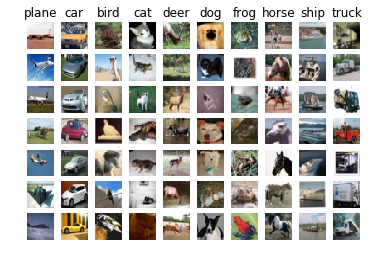

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
# Subsample the data for more efficient code execution in this exercise
mask = 0
num_training = 500
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 100
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
print (X_train.shape[0])
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)
print(y_train.shape)

500
(500, 3072) (100, 3072)
(500,)


In [5]:
class NearestNeighbor(object):
    def __init__(self):
        pass
    
    def train(self, X, Y):
        # X is NxD where each row ia an example. Y is 1D of size N
        self.Xtrain = X
        self.Ytrain = Y
        
    def predict(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype = self.Ytrain.dtype)
        
        for i in range(num_test):
            distances = np.sum(np.abs(self.Xtrain - X[i,:]), axis = 1)
            min_index = np.argmin(distances)
            Ypred[i] = self.Ytrain[min_index]
        
        return Ypred

In [6]:
nn = NearestNeighbor()
nn.train(X_train, y_train)
Ytrain_predict = nn.predict(X_test)
print(Ytrain_predict[:10])

# accuracy = np.mean(Ytrain_predict == y_train)
# print ('accuracy: %f' % (accuracy))

KeyboardInterrupt: 

In [ ]:
print(y_train[:10])

In [8]:
class KNearestNeighbor(object):
    
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.Xtrain = X
        self.Ytrain = y
    
    def predict(self, X, k = 1, num_loops = 0):
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loops(X)
        elif num_loops == 2:
            dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)

        return self.predict_labels(dists, k=k)  
    
    def compute_distances_no_loops(self, X):
        num_test = X.shape[0]
        num_train = self.Xtrain.shape[0]
        dists = np.zeros((num_test, num_train))
        #################### written by myself ####################
        X = X.reshape(X.shape[0], 1, X.shape[1])
        dists = np.sqrt(np.sum(np.abs(self.Xtrain - X).T, axis = 0).T)
        return dists
        ########################## END ##########################
        
    def compute_distances_one_loops(self, X):
        num_test = X.shape[0]
        dists = np.zeros(num_test, dtype = self.Ytrain.dtype)
        
        for i in range(num_test):
            dists[i] = np.sqrt(np.sum(np.abs(self.Xtrain - X[i,:]), \
                                       axis = 1))
        return dists
    
    def compute_distances_two_loops(self, X):
        num_test = X.shape[0]
        num_train = self.Xtrain.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
               ############# written by myself ####################
                dists[i][j] = np.sqrt(np.sum(np.abs(self.Xtrain[j,:]\
                                                   - X[i,:])))
        return dists
        ########################## END ##########################
        
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            #################### written by myself ####################
            closest_y = self.Ytrain[np.argsort(dists[i])[:k]]
            import scipy.stats
            y_pred[i] = scipy.stats.mode(closest_y)[0]             
        return y_pred
        ########################## END ##########################
        

In [10]:
# take first 100 for validation
X_val = X_train[:100, :]
y_val = y_train[:100]
# keep next 400 for training, saving memory
X_train = X_train[100:500, :]
y_train = y_train[100:500]

validation_accuracies = []

for k in [1, 3, 5, 10, 20]:
    
    knn = KNearestNeighbor()
    knn.train(X_train, y_train)
    
    Yval_predict = knn.predict(X_val, k = k)
    accu = np.mean(Yval_predict == y_val)
    
    print ('accuracy: %f' % (accu))
    
    validation_accuracies.append((k, accu))

accuracy: 0.270000
accuracy: 0.280000
accuracy: 0.210000
accuracy: 0.190000
accuracy: 0.180000
